In [1]:
from KP import KnapsackProblem
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Plot Example
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

## Value of objects as function of temperature

We plot  

\begin{align}
V = \sum_{\ell=1}^N v_{\ell} X_{\ell}, 
\end{align}

as a function of temperature, where 

\begin{equation}
X_{\ell} = \begin{cases} 1 & \text{if $\langle x_{\ell} \rangle>1/2$,} \\[.75em] 0 & \text{otherwise.}\end{cases}
\end{equation}

and where

\begin{equation}
\langle x_{\ell} \rangle  = \frac{ e^{\beta v_\ell}}{z_0^{-w_\ell} +e^{\beta v_\ell}},
\label{eq:xellsoln}
\end{equation}

with $z_0$ defined as the value of $z$ at which $F_N(z; \{\beta v_k\}, \{w_k\})$ is at a local minimum. 

----

#### Weight, Value, and Limit

In [2]:
## Weight and Value Parameters; randomly selected

# set seed
np.random.seed(42) 

# number of objects
nelems = 100

# Randomly choose the value and weight of each object
weight_vec = np.random.randint(1,10,nelems)
value_vec = np.random.randint(1,10,nelems)

# Defining Weight limit as the average 
# of the weights of randomly chosen objects
empt_list = []
for k in range(100):
    empt_list.append(np.dot(np.random.randint(0,2,nelems), weight_vec))
Wlimit = int(np.mean(empt_list))

# defining knapsack instance
KP_init = KnapsackProblem(weights = weight_vec, values = value_vec, limit = Wlimit)

#### Computing solution for each temperature

In [3]:
Tvals = np.linspace(.05, 5.0, 100)
total_value_list = list()
total_weight_list = list()

for Tval in Tvals: 
    soln = KP_init.largeN_algorithm(T = Tval)
    total_value_list.append(np.dot(soln, value_vec))
    total_weight_list.append(np.dot(soln, weight_vec))

#### Plotting Value

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


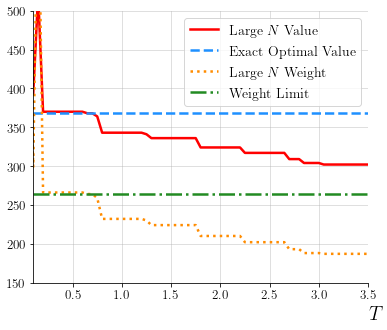

In [4]:
# figure
plt.figure(figsize = (6, 5))
ax = plt.subplot(111)

#plots of values
plt.plot(Tvals, total_value_list, color = 'red', label = r'Large $N$ Value', linewidth = 2.5)
soln_dp = KP_init.knapsack01_dpV()
plt.axhline(y = np.dot(soln_dp, value_vec), color = 'dodgerblue', linestyle = '--', label = 'Exact Optimal Value', linewidth = 2.5)
    
# plots of weights
plt.plot(Tvals, total_weight_list, color = 'darkorange', linestyle = 'dotted', label = r'Large $N$ Weight', linewidth = 2.5)
plt.axhline(y = Wlimit, color = 'forestgreen', linestyle = 'dashdot', label = 'Weight Limit', linewidth = 2.5)    
    
# plot formatting
plt.xlabel(r'$T$', fontsize = 20, x = 1.02)
plt.ylabel(r'', fontsize = 18, rotation = 0,y = 1.05)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylim([150, 500])
plt.xlim([.1, 3.5])
plt.legend(loc = 'best', fontsize = 14)
plt.grid(alpha = 0.5)

plt.show()
